# Image_Proccess_ORB

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1_path = '.\\input\\cat.3.jpg'
img2_path = '.\\input\\cat.7.jpg'
img3_path = '.\\input\\cat.12.jpg'

# img1 = cv2.imread(img1_path,0) # queryImage 
# img2 = cv2.imread(img2_path,0) # trainImage
# cv2.imshow("Image",img1)
# cv2.imshow("Image1",img2)

# cv2.waitKey(0)

(414, 500, 3)
2842
<class 'numpy.ndarray'>


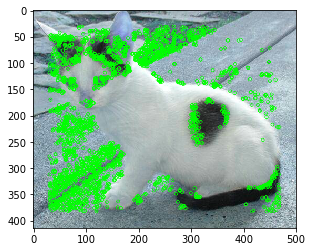

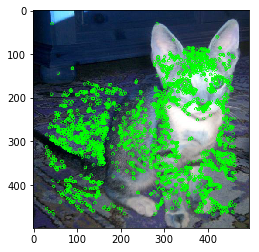

In [2]:
# coding=utf-8  
import cv2  
import numpy as np  
  
img1 = cv2.imread(img1_path)  
img2 = cv2.imread(img2_path)  
img3 = cv2.imread(img3_path)  
print(img1.shape)
# img1 = img1/img1.max()
# print(img1[0:10])
#最大特征点数,需要修改，5000太大。  
orb = cv2.ORB_create(5000)  
  
kp1, des1 = orb.detectAndCompute(img1,None)  
kp2, des2 = orb.detectAndCompute(img2,None)  

print(len(kp1))
# print(dir(kp1[0]))
# print(kp1[0].angle)
# print(kp1[0].size)
# print(kp1[0].octave)
# print(kp1[0].pt)
print(type(des1))

gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img = cv2.drawKeypoints(gray, kp1, img1, img1)

img1_0 = cv2.drawKeypoints(img1,kp1,img1, color=(0,255,0))
img2_0 = cv2.drawKeypoints(img2,kp2,img2, color=(0,255,0))
# plt.imshow(img1),plt.show()
plt.imshow(img1_0),plt.show()
plt.imshow(img2_0),plt.show()

# #提取并计算特征点  
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# # print(len(bf))
# #knn筛选结果  
matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)  
good = [m for (m,n) in matches if m.distance < 0.75*n.distance]  
# #查看最大匹配点数目  
# print(len(good))

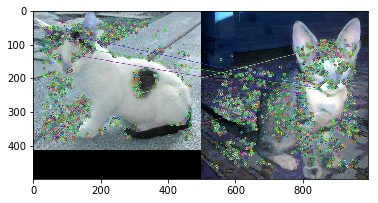

(<matplotlib.image.AxesImage at 0x2cd2337fa58>, None)

In [3]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches[:5], img3)

plt.imshow(img3),plt.show()